In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [163]:
path = '/home/kpierce/Desktop/reverting-onecell/data/'
files = [f for f in os.listdir(path) if f.endswith('.npy')]
data = [np.load(path+f).item() for f in files]
for d in data: # add in a flow attribute
    d['flow'] = d['filename'].split('/')[-1].split('-')[0].split('_')[1]
# colors for plotting
colors = {'a':'red','g':'magenta', 'i':'green','l':'orange','n':'blue'}
for d in data:
    d['color']= colors[d['flow']]
a = 0.3 # particle radius 
dx = 22.5 # control volume cell size 
phi = 0.6 # packing fraction 
n0 = 21 #initial number of moving particles 
m0 = 50000 # initial number of stationary particles 
z1 = np.pi*a**2/(phi*dx) # relevant length scale of bed elevations

In [164]:
lvals = [d['l'] for d in data]
flows = [d['flow'] for d in data]
n_means_anc = [d['ancey_n_stats']['n_mean'] for d in data]
n_devs_anc = [np.sqrt(d['ancey_n_stats']['n_var']) for d in data]
m_means = []
m_devs = []
n_means = []
n_devs = []
for d in data:
    m,pm = d['m_pdf'].T
    mean = (m*pm).sum()
    std = np.sqrt(((m-mean)**2*pm).sum())
    m_means.append(mean)
    m_devs.append(std)
    n,pn = d['n_pdf'].T
    mean = (n*pn).sum()
    std = np.sqrt(((n-mean)**2*pn).sum())
    n_means.append(mean)
    n_devs.append(std)

Text(0,0.5,'$mean(m)$')

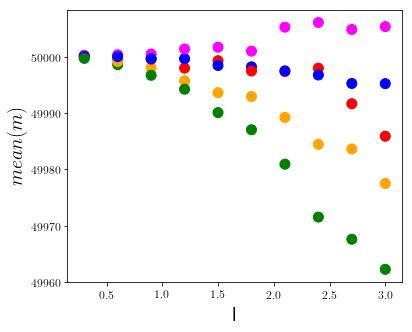

In [165]:
plt.scatter(lvals,m_means,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$mean(m)$')

Text(0,0.5,'$std(m)$')

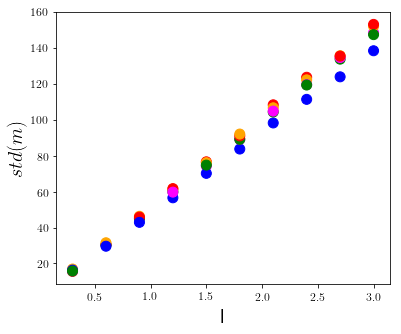

In [166]:
plt.scatter(lvals,m_devs,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$std(m)$')

Text(0,0.5,'$mean(n)$')

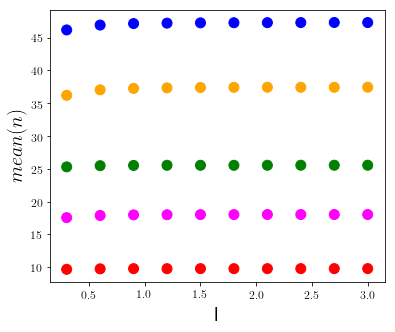

In [167]:
plt.scatter(lvals,n_means,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$mean(n)$')

Text(0,0.5,'$std(n)$')

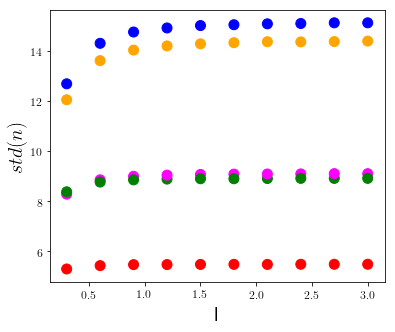

In [168]:
plt.scatter(lvals,n_devs,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$std(n)$')

(1e-05, 1000000.0)

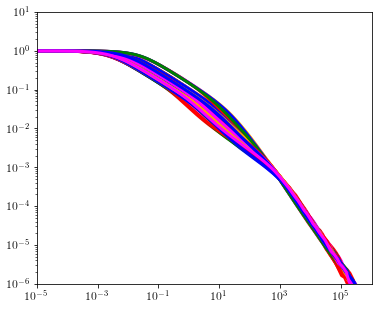

In [169]:
for d in data:
    t,cdf = d['rt_cdf'].T
    l = d['l']
    E = d['E']
    plt.loglog(E*t*z1/l,cdf,color=colors[d['flow']])
plt.ylim(1e-6,10)
plt.xlim(1e-5,1e6)

Text(0,0.5,'$deviation between mean(n) ancey and me$')

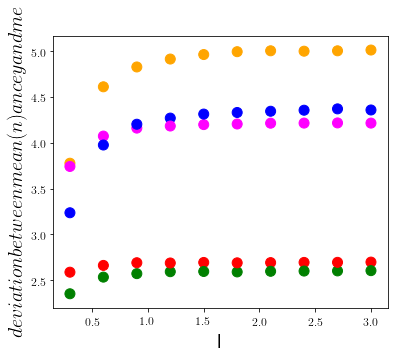

In [170]:
# now look at deviations from ancey n statistics
meanshift = np.array(n_means)-np.array(n_means_anc)
plt.scatter(lvals,meanshift,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$deviation between mean(n) ancey and me$')

Text(0,0.5,'$deviation between var(n) ancey and me$')

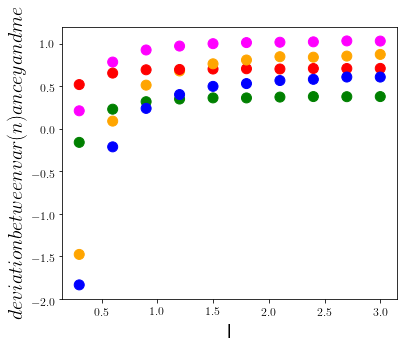

In [171]:
# now look at deviations from ancey n statistics
varshift = np.array(n_devs)-np.array(n_devs_anc)
plt.scatter(lvals,varshift,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$deviation between var(n) ancey and me$')

# now make the publication figures

In [406]:
from matplotlib import rcParams
rcParams['axes.labelsize'] = 20
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 16
from matplotlib import rcParams
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = True
rcParams['figure.figsize'] = 6,5
rcParams.update({'font.size': 22})
rcParams['lines.linewidth']=3
rcParams['lines.markersize']=5




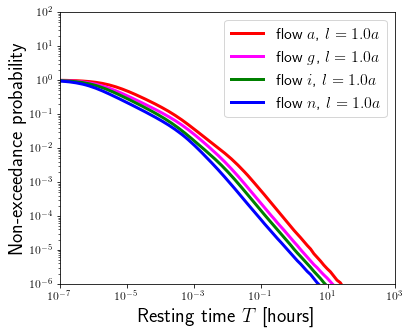

In [414]:
# panel (a) 
dats = sorted([d for d in data if d['l']==a and d['flow']!='l'],key=lambda x: x['flow'])
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t/3600
    plt.loglog(t,cdf,color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
plt.xlim(1e-7,1e3)
plt.ylim(1e-6,1e2)
plt.legend()
plt.xlabel('Resting time $T$ [hours]')
plt.ylabel('Non-exceedance probability')
plt.savefig('../jgr/figures/1.pdf',bbox_inches='tight',dpi=600)

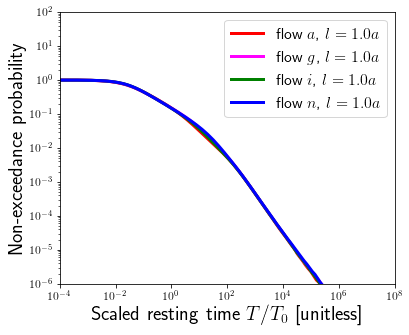

In [415]:
# panel (b) 
dats = sorted([d for d in data if d['l']==a and d['flow']!='l'],key=lambda x:x['flow'])
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t
    E = d['E']
    l = d['l']
    plt.loglog(t*E/l*z1,cdf,color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
plt.xlim(1e-4,1e8)
plt.ylim(1e-6,1e2)
plt.legend()
plt.xlabel('Scaled resting time $T/T_0$ [unitless]')
plt.ylabel('Non-exceedance probability')
plt.savefig('../jgr/figures/2.pdf',bbox_inches='tight',dpi=600)

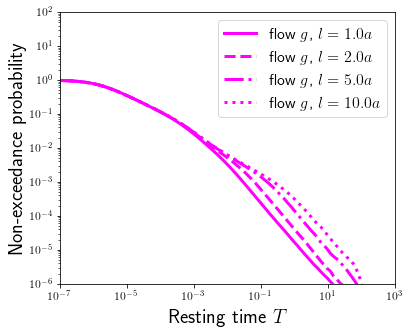

In [416]:
# panel c 
incl = [1.0,2.0,5.0,10.0]
dats = sorted([d for d in data if d['flow']=='g' and round(d['l']/a,1) in incl],key=lambda x:x['l'])
lines = ['-','--','-.',':']
i=0
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t/3600
    E = d['E']
    l = d['l']
    plt.loglog(t,cdf,linestyle=lines[i],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
    i+=1
plt.xlim(1e-7,1e3)
plt.ylim(1e-6,1e2)
plt.legend()
plt.xlabel('Resting time $T$')
plt.ylabel('Non-exceedance probability')
plt.savefig('../jgr/figures/3.pdf',bbox_inches='tight',dpi=600)

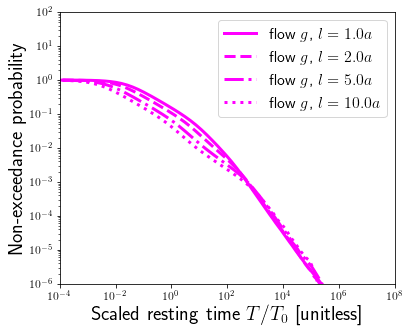

In [417]:
# panel d 
incl = [1.0,2.0,5.0,10.0]
dats = sorted([d for d in data if d['flow']=='g' and round(d['l']/a,1) in incl],key=lambda x:x['l'])
lines = ['-','--','-.',':']
i=0
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t
    E = d['E']
    l = d['l']
    plt.loglog(t*E/l*z1,cdf,linestyle=lines[i],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
    i+=1
plt.xlim(1e-4,1e8)
plt.ylim(1e-6,1e2)
plt.legend()
plt.xlabel('Scaled resting time $T/T_0$ [unitless]')
plt.ylabel('Non-exceedance probability')
plt.savefig('../jgr/figures/4.pdf',bbox_inches='tight',dpi=600)

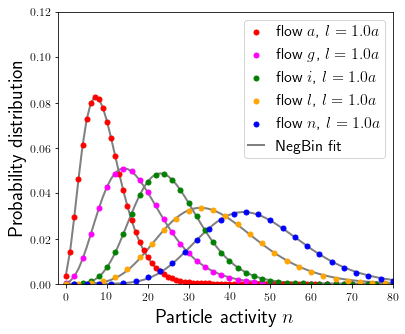

In [444]:
from scipy import optimize
from scipy.special import gamma, factorial
def nbin(k,r,p):
    return gamma(k+r)/gamma(r)/factorial(k)*p**r*(1-p)**k

# now make the particle activity figure 
dats = sorted([x for x in data if round(x['l']/a,1)==1.0],key = lambda x: x['flow'])
i = 0 
for d in dats:
    n,pn = d['n_pdf'].T
    if i==0:
        lam = 5.45+6.59 # sum of lambdas 
        mu = 3.74
        alph = 4.64 + 0.77# sig + nu 
        ds = 1
    elif i==1:
        lam = 7.74 + 8.42
        mu = 4.34
        alph = 4.95 + 0.56
        ds = 2
    elif i==2:
        lam = 15.56 + 22.07
        mu = 3.56
        alph = 4.52 + 0.68   
        ds = 2
    elif i==3:
        lam = 15.52 + 14.64
        mu = 4.32
        alph = 4.77 + 0.48
        ds = 3
    elif i==4:
        lam = 15.45 + 24.49
        mu = 3.64
        alph = 4.21 + 0.36
        ds = 3
    plt.scatter(n[::ds],pn[::ds],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
    popt, _ = optimize.curve_fit(nbin, n, pn,p0=[lam/mu,1-mu/alph])
    
    if i!=4:
        plt.plot(n, nbin(n, *popt),color='grey',lw=2,zorder=-1)
    if i==4:
        plt.plot(n, nbin(n, *popt),color='grey',lw=2,zorder=-1,label='NegBin fit')

    i += 1
plt.xlim(-2,80)
plt.ylim(0,0.12)
plt.xlabel('Particle activity $n$')
plt.ylabel('Probability distribution')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,5,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],borderpad=0.25,handlelength=1.0)
plt.savefig('../jgr/figures/activity.pdf',bbox_inches='tight',dpi=600)

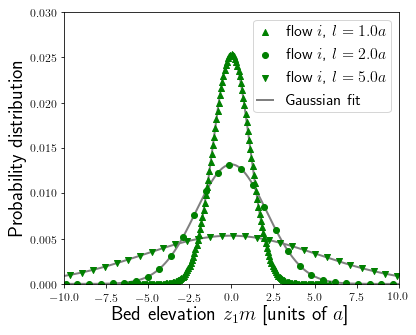

In [446]:
from scipy import optimize

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)


rcParams['lines.markersize']=6

dats = sorted([x for x in data if round(x['l']/a,1) in [1.0,2.0,5.0] and x['flow']=='i'],key = lambda x: x['l'])
i=0
for d in dats:
    m,pm = d['m_pdf'].T
    m = m-(m*pm).sum()
    m = z1*m/a
    if i==0:
        ds = 1
        marker = '^'
    elif i==1:
        ds = 10
        marker = 'o'
    elif i==2:
        ds = 10
        marker = 'v'
    plt.scatter(m[::ds],pm[::ds],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)),marker=marker)
    
    mean = (m*pm).sum()
    std = np.sqrt(((m-mean)**2*pm).sum())
    popt, _ = optimize.curve_fit(gaussian, m, pm, p0 = [pm.max(),mean,std])
    if i!=2:
        plt.plot(m, gaussian(m, *popt),color='grey',lw=2,zorder=-1)
    if i==2:
        plt.plot(m, gaussian(m, *popt),color='grey',lw=2,zorder=-1,label='Gaussian fit')

    
    i+=1
plt.xlim(-10,10)
plt.ylim(0,0.03)
plt.xlabel('Bed elevation $z_1 m$ [units of $a$]')
plt.ylabel('Probability distribution')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],borderpad=0.25,handlelength=1.0)
rcParams['lines.markersize']=5
plt.savefig('../jgr/figures/ele.pdf',bbox_inches='tight',dpi=600)
#plt.legend(borderpad=0,handlelength=1.0)